# IDS e IBS: Búsquedas Iterativas

Este notebook incluye:

1. **Teoría sobre IDS (Iterative Deepening Search)**
2. **Teoría sobre IBS (Iterative Broadening Search)**
3. **Implementación de IDS con ejemplos comentados**
4. **Implementación de IBS con ejemplos comentados**
5. **Comparación IDS vs DFS vs BFS**
6. **Casos reales de uso**
7. **Ejercicios prácticos**


## 📚 Teoría: ¿Qué son las búsquedas iterativas?

Las búsquedas iterativas combinan las **ventajas** de DFS y BFS, eliminando sus **desventajas**.

### 🔴 Recordatorio: Problema de DFS
- **Ventaja:** Usa poca memoria (solo el camino actual)
- **Desventaja:** Puede encontrar caminos muy largos, no garantiza el óptimo

### 🔵 Recordatorio: Problema de BFS
- **Ventaja:** Encuentra el camino más corto siempre
- **Desventaja:** Usa MUCHA memoria (guarda todos los nodos de cada nivel)

### 💡 Solución: Búsquedas Iterativas

**IDS** e **IBS** combinan lo mejor de ambos mundos usando un enfoque **iterativo**.


## 🔄 IDS - Iterative Deepening Search

### ¿Qué es IDS?

**IDS** ejecuta DFS **repetidas veces** con límites de profundidad crecientes:
- Primera iteración: DFS hasta profundidad 0
- Segunda iteración: DFS hasta profundidad 1
- Tercera iteración: DFS hasta profundidad 2
- ... hasta encontrar la solución

### 🎯 Ventajas de IDS:
✅ Encuentra el camino **MÁS CORTO** (como BFS)  
✅ Usa **POCA MEMORIA** (como DFS)  
✅ Combina lo mejor de ambos mundos  

### ⚠️ Desventaja:
- Re-explora nodos en cada iteración (pero vale la pena)

### 📊 Ejemplo Visual:

```
Grafo:        A
             /|\
            B C D
           /|
          E F

Iteración 1 (profundidad 0): Explora solo A
Iteración 2 (profundidad 1): Explora A, B, C, D
Iteración 3 (profundidad 2): Explora A, B, C, D, E, F
```


In [2]:
# ====================
# IMPLEMENTACIÓN DE IDS (Iterative Deepening Search)
# ====================

import matplotlib.pyplot as plt  # Para visualización
import networkx as nx  # Para grafos
from collections import deque  # Para estructuras de datos

def dfs_limitado(grafo, nodo, objetivo, limite, camino=None):
    """
    DFS con límite de profundidad.
    
    Parámetros:
    - grafo: diccionario de adyacencias
    - nodo: nodo actual
    - objetivo: nodo que buscamos
    - limite: profundidad máxima permitida
    - camino: lista con el camino actual
    
    Retorna:
    - Lista con el camino si encuentra objetivo
    - None si no encuentra en este límite
    """
    
    # Inicializamos el camino si es la primera llamada
    if camino is None:
        camino = []
    
    # Agregamos el nodo actual al camino
    camino = camino + [nodo]
    
    # ¿Es el objetivo? ¡Éxito!
    if nodo == objetivo:
        return camino
    
    # Si llegamos al límite de profundidad, no exploramos más
    if limite <= 0:
        return None  # No seguimos explorando
    
    # Exploramos los vecinos (recursión con límite - 1)
    for vecino in grafo.get(nodo, []):
        # Evitamos ciclos: no volver a nodos ya visitados en este camino
        if vecino not in camino:
            # Llamada recursiva con profundidad reducida
            resultado = dfs_limitado(grafo, vecino, objetivo, limite - 1, camino)
            
            # Si encontramos el objetivo, retornamos
            if resultado is not None:
                return resultado
    
    # No encontramos en este camino
    return None


def ids(grafo, inicio, objetivo, max_profundidad=10):
    """
    IDS - Iterative Deepening Search
    
    Ejecuta DFS con límites crecientes de profundidad.
    
    Parámetros:
    - grafo: diccionario de adyacencias
    - inicio: nodo inicial
    - objetivo: nodo que buscamos
    - max_profundidad: profundidad máxima (límite de seguridad)
    
    Retorna:
    - Tupla (camino, profundidad, nodos_explorados)
    """
    
    print("🔄 IDS - Iterative Deepening Search")
    print("=" * 60)
    
    # Contador de nodos explorados
    total_explorados = 0
    
    # Iteramos aumentando el límite de profundidad
    for profundidad in range(max_profundidad + 1):
        print(f"\n📍 Iteración {profundidad + 1}: Profundidad límite = {profundidad}")
        
        # Ejecutamos DFS limitado con esta profundidad
        resultado = dfs_limitado(grafo, inicio, objetivo, profundidad)
        
        # Contamos cuántos nodos exploramos (aproximación)
        # En cada iteración exploramos los nodos hasta esa profundidad
        explorados_iteracion = len([n for n in grafo.keys() if True])  # Simplificación
        total_explorados += explorados_iteracion
        
        # Mostramos el resultado de esta iteración
        if resultado:
            print(f"   ✅ ¡Objetivo encontrado!")
            print(f"   Camino: {' → '.join(resultado)}")
            print(f"   Longitud del camino: {len(resultado) - 1} pasos")
            print("\n" + "=" * 60)
            return resultado, profundidad, total_explorados
        else:
            print(f"   ❌ No encontrado en profundidad {profundidad}")
    
    # No encontrado después de max_profundidad iteraciones
    print(f"\n❌ Objetivo no encontrado hasta profundidad {max_profundidad}")
    print("=" * 60)
    return None, max_profundidad, total_explorados


# ====================
# EJEMPLO 1: GRAFO SIMPLE
# ====================

print("\n" + "=" * 60)
print("EJEMPLO 1: Red de Ciudades")
print("=" * 60 + "\n")

# Creamos un grafo de ciudades
grafo_ciudades = {
    'Madrid': ['Barcelona', 'Valencia', 'Sevilla'],
    'Barcelona': ['Madrid', 'Zaragoza', 'Valencia'],
    'Valencia': ['Madrid', 'Barcelona', 'Alicante'],
    'Sevilla': ['Madrid', 'Málaga'],
    'Zaragoza': ['Barcelona', 'Bilbao'],
    'Alicante': ['Valencia', 'Murcia'],
    'Málaga': ['Sevilla', 'Granada'],
    'Bilbao': ['Zaragoza'],
    'Murcia': ['Alicante', 'Granada'],
    'Granada': ['Málaga', 'Murcia']
}

# Buscamos el camino de Madrid a Granada
resultado, profundidad_final, nodos_explorados = ids(
    grafo_ciudades, 
    'Madrid', 
    'Granada', 
    max_profundidad=10
)

if resultado:
    print(f"\n🎯 RESUMEN:")
    print(f"   Camino encontrado: {' → '.join(resultado)}")
    print(f"   Profundidad necesaria: {profundidad_final}")
    print(f"   Longitud del camino: {len(resultado) - 1} pasos")



EJEMPLO 1: Red de Ciudades

🔄 IDS - Iterative Deepening Search

📍 Iteración 1: Profundidad límite = 0
   ❌ No encontrado en profundidad 0

📍 Iteración 2: Profundidad límite = 1
   ❌ No encontrado en profundidad 1

📍 Iteración 3: Profundidad límite = 2
   ❌ No encontrado en profundidad 2

📍 Iteración 4: Profundidad límite = 3
   ✅ ¡Objetivo encontrado!
   Camino: Madrid → Sevilla → Málaga → Granada
   Longitud del camino: 3 pasos


🎯 RESUMEN:
   Camino encontrado: Madrid → Sevilla → Málaga → Granada
   Profundidad necesaria: 3
   Longitud del camino: 3 pasos


### 📊 Visualización del Grafo de Ciudades


C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\2766240054.py:78: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\2766240054.py:78: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manel.cerezo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


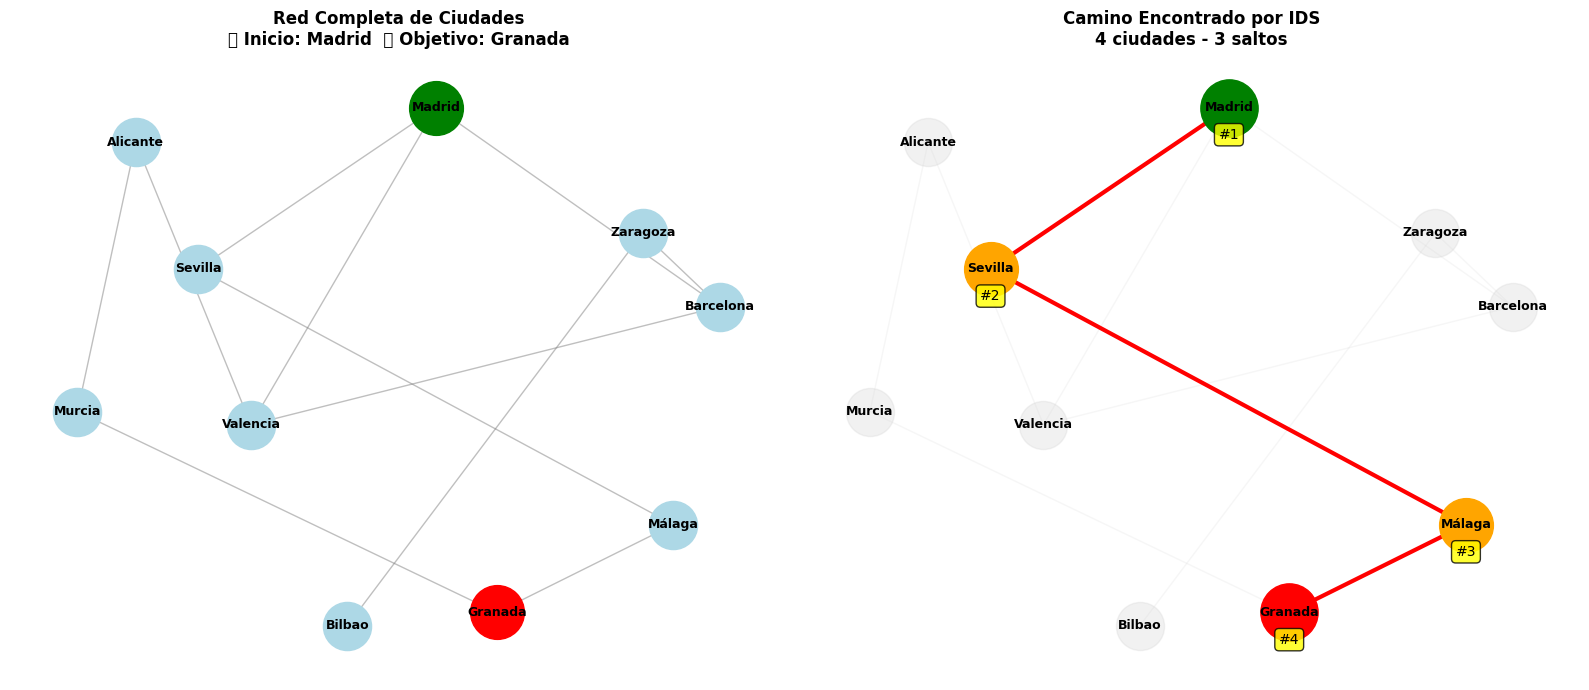


📍 Camino detallado: Madrid → Sevilla → Málaga → Granada


In [3]:
# ====================
# VISUALIZACIÓN DEL GRAFO Y CAMINO ENCONTRADO
# ====================

# Creamos el grafo con NetworkX para visualizarlo
G = nx.Graph()

# Agregamos todas las aristas del grafo de ciudades
for ciudad, vecinos in grafo_ciudades.items():
    for vecino in vecinos:
        G.add_edge(ciudad, vecino)

# Creamos el layout del grafo (posiciones de los nodos)
pos = nx.spring_layout(G, seed=42, k=2)  # k=2 para más separación

# Creamos figura con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# ===== GRÁFICO 1: GRAFO COMPLETO =====
ax1 = axes[0]

# Dibujamos todos los nodos y aristas
nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                       node_size=1200, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color='gray', 
                       width=1, alpha=0.5, ax=ax1)
nx.draw_networkx_labels(G, pos, font_size=9, 
                        font_weight='bold', ax=ax1)

# Resaltamos inicio y objetivo
nx.draw_networkx_nodes(G, pos, nodelist=['Madrid'], 
                       node_color='green', node_size=1500, ax=ax1)
nx.draw_networkx_nodes(G, pos, nodelist=['Granada'], 
                       node_color='red', node_size=1500, ax=ax1)

ax1.set_title('Red Completa de Ciudades\n🟢 Inicio: Madrid  🔴 Objetivo: Granada', 
              fontsize=12, fontweight='bold')
ax1.axis('off')

# ===== GRÁFICO 2: CAMINO ENCONTRADO POR IDS =====
ax2 = axes[1]

# Dibujamos el grafo base (transparente)
nx.draw_networkx_nodes(G, pos, node_color='lightgray', 
                       node_size=1200, alpha=0.3, ax=ax2)
nx.draw_networkx_edges(G, pos, edge_color='lightgray', 
                       width=1, alpha=0.2, ax=ax2)
nx.draw_networkx_labels(G, pos, font_size=9, 
                        font_weight='bold', ax=ax2)

# Resaltamos el CAMINO encontrado
if resultado:
    # Dibujamos nodos del camino
    nx.draw_networkx_nodes(G, pos, nodelist=resultado, 
                           node_color='orange', node_size=1500, ax=ax2)
    
    # Dibujamos aristas del camino (en orden)
    camino_edges = [(resultado[i], resultado[i+1]) for i in range(len(resultado)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=camino_edges, 
                           edge_color='red', width=3, ax=ax2)
    
    # Resaltamos inicio y fin
    nx.draw_networkx_nodes(G, pos, nodelist=[resultado[0]], 
                           node_color='green', node_size=1700, ax=ax2)
    nx.draw_networkx_nodes(G, pos, nodelist=[resultado[-1]], 
                           node_color='red', node_size=1700, ax=ax2)
    
    # Agregamos números de orden en el camino
    for i, ciudad in enumerate(resultado):
        x, y = pos[ciudad]
        ax2.text(x, y-0.12, f'#{i+1}', fontsize=10, ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

ax2.set_title(f'Camino Encontrado por IDS\n{len(resultado)} ciudades - {len(resultado)-1} saltos', 
              fontsize=12, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print(f"\n📍 Camino detallado: {' → '.join(resultado)}")


## 🔄 IBS - Iterative Broadening Search

### ¿Qué es IBS?

**IBS** es similar a IDS pero limita el **factor de ramificación** (branching factor) en lugar de la profundidad:
- Primera iteración: Explora solo 1 hijo por nodo
- Segunda iteración: Explora hasta 2 hijos por nodo
- Tercera iteración: Explora hasta 3 hijos por nodo
- ... hasta encontrar la solución

### 🎯 Ventajas de IBS:
✅ Útil cuando el **factor de ramificación** es muy alto  
✅ Reduce la memoria necesaria  
✅ Encuentra soluciones explorando menos ramas  

### 📊 Diferencia con IDS:

```
IDS: Limita la PROFUNDIDAD (cuánto bajamos)
IBS: Limita la AMPLITUD (cuántos hijos exploramos)

Nodo A tiene 5 hijos: [B, C, D, E, F]

IBS iteración 1: Solo explora B
IBS iteración 2: Explora B y C
IBS iteración 3: Explora B, C y D
...
```

### ⚠️ Cuándo usar IBS:
- Cuando cada nodo tiene MUCHOS hijos (alto branching factor)
- Ejemplos: juegos de ajedrez, generadores combinatorios


In [4]:
# ====================
# IMPLEMENTACIÓN DE IBS (Iterative Broadening Search)
# ====================

def dfs_amplitud_limitada(grafo, nodo, objetivo, max_hijos, camino=None, visitados=None):
    """
    DFS con límite de amplitud (número de hijos a explorar).
    
    Parámetros:
    - grafo: diccionario de adyacencias
    - nodo: nodo actual
    - objetivo: nodo que buscamos
    - max_hijos: máximo número de hijos a explorar por nodo
    - camino: lista con el camino actual
    - visitados: conjunto de nodos ya visitados (evita ciclos)
    
    Retorna:
    - Lista con el camino si encuentra objetivo
    - None si no encuentra
    """
    
    # Inicializamos estructuras si es la primera llamada
    if camino is None:
        camino = []
    if visitados is None:
        visitados = set()
    
    # Agregamos el nodo actual
    camino = camino + [nodo]
    visitados.add(nodo)
    
    # ¿Es el objetivo? ¡Éxito!
    if nodo == objetivo:
        return camino
    
    # Obtenemos los vecinos y LIMITAMOS cuántos exploramos
    vecinos = grafo.get(nodo, [])
    vecinos_limitados = vecinos[:max_hijos]  # Solo tomamos los primeros max_hijos
    
    # Exploramos solo los vecinos permitidos
    for vecino in vecinos_limitados:
        # Evitamos ciclos
        if vecino not in visitados:
            # Llamada recursiva (sin límite de profundidad)
            resultado = dfs_amplitud_limitada(
                grafo, vecino, objetivo, max_hijos, camino, visitados.copy()
            )
            
            # Si encontramos el objetivo, retornamos
            if resultado is not None:
                return resultado
    
    # No encontramos en este camino
    return None


def ibs(grafo, inicio, objetivo, max_amplitud=10):
    """
    IBS - Iterative Broadening Search
    
    Ejecuta DFS con límites crecientes de amplitud (branching factor).
    
    Parámetros:
    - grafo: diccionario de adyacencias
    - inicio: nodo inicial
    - objetivo: nodo que buscamos
    - max_amplitud: amplitud máxima (límite de seguridad)
    
    Retorna:
    - Tupla (camino, amplitud_usada)
    """
    
    print("🔄 IBS - Iterative Broadening Search")
    print("=" * 60)
    
    # Iteramos aumentando el límite de amplitud
    for amplitud in range(1, max_amplitud + 1):
        print(f"\n📍 Iteración {amplitud}: Máximo {amplitud} hijo(s) por nodo")
        
        # Ejecutamos DFS con amplitud limitada
        resultado = dfs_amplitud_limitada(grafo, inicio, objetivo, amplitud)
        
        # Mostramos el resultado de esta iteración
        if resultado:
            print(f"   ✅ ¡Objetivo encontrado!")
            print(f"   Camino: {' → '.join(resultado)}")
            print(f"   Longitud del camino: {len(resultado) - 1} pasos")
            print("\n" + "=" * 60)
            return resultado, amplitud
        else:
            print(f"   ❌ No encontrado con amplitud {amplitud}")
    
    # No encontrado
    print(f"\n❌ Objetivo no encontrado hasta amplitud {max_amplitud}")
    print("=" * 60)
    return None, max_amplitud


# ====================
# EJEMPLO 2: GRAFO CON ALTO BRANCHING FACTOR
# ====================

print("\n" + "=" * 60)
print("EJEMPLO 2: Red Social con Muchos Contactos")
print("=" * 60 + "\n")

# Creamos un grafo donde algunos nodos tienen MUCHOS hijos
grafo_social = {
    'Ana': ['Bob', 'Carlos', 'Diana', 'Elena', 'Felipe'],  # 5 contactos
    'Bob': ['Gina', 'Hector'],
    'Carlos': ['Ivan'],
    'Diana': ['Jorge', 'Karla'],
    'Elena': ['Luis'],
    'Felipe': ['Maria', 'Nora'],
    'Gina': ['Oscar'],
    'Hector': ['Patricia'],
    'Ivan': [],
    'Jorge': [],
    'Karla': ['Roberto'],  # ¡Aquí está nuestro objetivo!
    'Luis': [],
    'Maria': [],
    'Nora': [],
    'Oscar': [],
    'Patricia': [],
    'Roberto': []
}

# Buscamos a Roberto desde Ana usando IBS
resultado_ibs, amplitud_usada = ibs(
    grafo_social,
    'Ana',
    'Roberto',
    max_amplitud=10
)

if resultado_ibs:
    print(f"\n🎯 RESUMEN:")
    print(f"   Camino encontrado: {' → '.join(resultado_ibs)}")
    print(f"   Amplitud necesaria: {amplitud_usada} hijos por nodo")
    print(f"   Longitud del camino: {len(resultado_ibs) - 1} pasos")



EJEMPLO 2: Red Social con Muchos Contactos

🔄 IBS - Iterative Broadening Search

📍 Iteración 1: Máximo 1 hijo(s) por nodo
   ❌ No encontrado con amplitud 1

📍 Iteración 2: Máximo 2 hijo(s) por nodo
   ❌ No encontrado con amplitud 2

📍 Iteración 3: Máximo 3 hijo(s) por nodo
   ✅ ¡Objetivo encontrado!
   Camino: Ana → Diana → Karla → Roberto
   Longitud del camino: 3 pasos


🎯 RESUMEN:
   Camino encontrado: Ana → Diana → Karla → Roberto
   Amplitud necesaria: 3 hijos por nodo
   Longitud del camino: 3 pasos


### 📊 Visualización de la Red Social


C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\2342275886.py:114: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\2342275886.py:114: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\2342275886.py:114: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manel.cerezo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


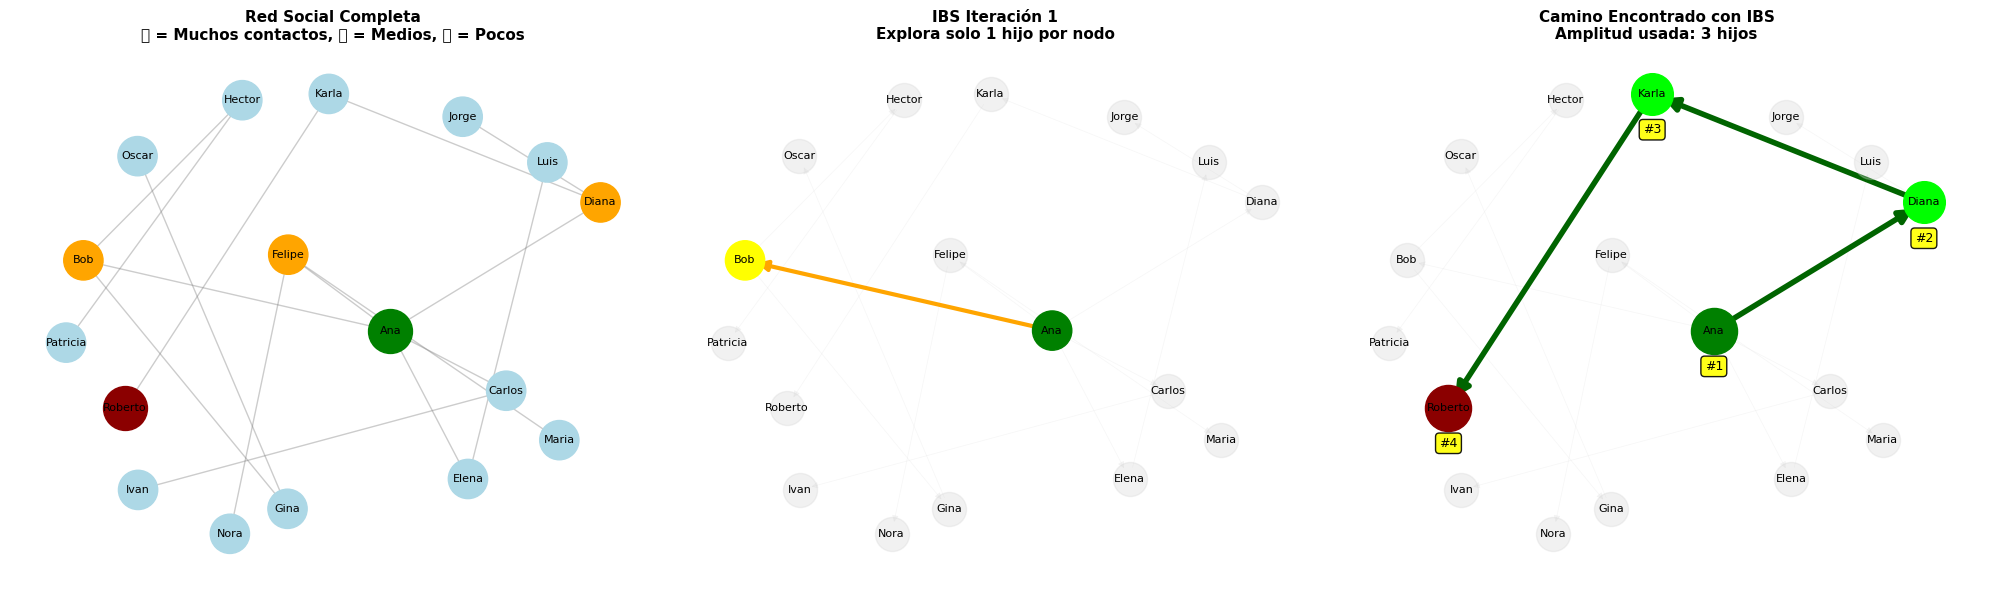


🔍 Ana tiene 5 contactos directos
📍 IBS exploró gradualmente hasta encontrar a Roberto
🎯 Camino: Ana → Diana → Karla → Roberto


In [5]:
# ====================
# VISUALIZACIÓN DEL GRAFO SOCIAL Y CAMINO IBS
# ====================

# Creamos el grafo con NetworkX
G_social = nx.DiGraph()  # Grafo dirigido para mostrar direcciones

# Agregamos todas las conexiones
for persona, contactos in grafo_social.items():
    for contacto in contactos:
        G_social.add_edge(persona, contacto)

# Layout jerárquico (mejor para visualizar niveles)
pos_social = nx.spring_layout(G_social, seed=123, k=1.5)

# Creamos figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ===== GRÁFICO 1: RED COMPLETA =====
ax1 = axes[0]

# Coloreamos según el número de contactos (branching factor)
node_colors = []
for node in G_social.nodes():
    num_contactos = len(grafo_social.get(node, []))
    if num_contactos >= 5:
        node_colors.append('red')  # Muchos contactos
    elif num_contactos >= 2:
        node_colors.append('orange')  # Contactos medios
    else:
        node_colors.append('lightblue')  # Pocos contactos

nx.draw_networkx_nodes(G_social, pos_social, node_color=node_colors,
                       node_size=800, ax=ax1)
nx.draw_networkx_edges(G_social, pos_social, edge_color='gray',
                       width=1, alpha=0.4, arrows=True, 
                       arrowsize=10, ax=ax1)
nx.draw_networkx_labels(G_social, pos_social, font_size=8, ax=ax1)

# Resaltamos inicio y objetivo
nx.draw_networkx_nodes(G_social, pos_social, nodelist=['Ana'],
                       node_color='green', node_size=1000, ax=ax1)
nx.draw_networkx_nodes(G_social, pos_social, nodelist=['Roberto'],
                       node_color='darkred', node_size=1000, ax=ax1)

ax1.set_title('Red Social Completa\n🔴 = Muchos contactos, 🟠 = Medios, 🔵 = Pocos',
              fontsize=11, fontweight='bold')
ax1.axis('off')

# ===== GRÁFICO 2: ITERACIÓN 1 DE IBS (solo 1 hijo) =====
ax2 = axes[1]

# Dibujamos base transparente
nx.draw_networkx_nodes(G_social, pos_social, node_color='lightgray',
                       node_size=600, alpha=0.3, ax=ax2)
nx.draw_networkx_edges(G_social, pos_social, edge_color='lightgray',
                       width=0.5, alpha=0.2, arrows=True, ax=ax2)

# Simulamos iteración 1 (solo primer hijo de Ana)
primer_hijo = grafo_social['Ana'][0]  # Bob
nx.draw_networkx_nodes(G_social, pos_social, 
                       nodelist=['Ana', primer_hijo],
                       node_color=['green', 'yellow'],
                       node_size=800, ax=ax2)
nx.draw_networkx_edges(G_social, pos_social,
                       edgelist=[('Ana', primer_hijo)],
                       edge_color='orange', width=3,
                       arrows=True, arrowsize=15, ax=ax2)
nx.draw_networkx_labels(G_social, pos_social, font_size=8, ax=ax2)

ax2.set_title('IBS Iteración 1\nExplora solo 1 hijo por nodo',
              fontsize=11, fontweight='bold')
ax2.axis('off')

# ===== GRÁFICO 3: CAMINO FINAL ENCONTRADO =====
ax3 = axes[2]

# Dibujamos base transparente
nx.draw_networkx_nodes(G_social, pos_social, node_color='lightgray',
                       node_size=600, alpha=0.3, ax=ax3)
nx.draw_networkx_edges(G_social, pos_social, edge_color='lightgray',
                       width=0.5, alpha=0.2, arrows=True, ax=ax3)
nx.draw_networkx_labels(G_social, pos_social, font_size=8, ax=ax3)

# Resaltamos el CAMINO encontrado por IBS
if resultado_ibs:
    # Nodos del camino
    nx.draw_networkx_nodes(G_social, pos_social, nodelist=resultado_ibs,
                           node_color='lime', node_size=900, ax=ax3)
    
    # Aristas del camino
    camino_edges_ibs = [(resultado_ibs[i], resultado_ibs[i+1]) 
                        for i in range(len(resultado_ibs)-1)]
    nx.draw_networkx_edges(G_social, pos_social, edgelist=camino_edges_ibs,
                           edge_color='darkgreen', width=4,
                           arrows=True, arrowsize=20, ax=ax3)
    
    # Inicio y fin
    nx.draw_networkx_nodes(G_social, pos_social, nodelist=[resultado_ibs[0]],
                           node_color='green', node_size=1100, ax=ax3)
    nx.draw_networkx_nodes(G_social, pos_social, nodelist=[resultado_ibs[-1]],
                           node_color='darkred', node_size=1100, ax=ax3)
    
    # Números de orden
    for i, persona in enumerate(resultado_ibs):
        x, y = pos_social[persona]
        ax3.text(x, y-0.15, f'#{i+1}', fontsize=9, ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.9))

ax3.set_title(f'Camino Encontrado con IBS\nAmplitud usada: {amplitud_usada} hijos',
              fontsize=11, fontweight='bold')
ax3.axis('off')

plt.tight_layout()
plt.show()

print(f"\n🔍 Ana tiene {len(grafo_social['Ana'])} contactos directos")
print(f"📍 IBS exploró gradualmente hasta encontrar a Roberto")
print(f"🎯 Camino: {' → '.join(resultado_ibs)}")


## 📊 Comparación: IDS vs IBS vs DFS vs BFS

Vamos a comparar los 4 algoritmos en el mismo problema.


In [6]:
# ====================
# COMPARACIÓN DE LOS 4 ALGORITMOS
# ====================

import time

# Función DFS estándar (para comparar)
def dfs_estandar(grafo, inicio, objetivo, visitados=None, camino=None):
    """DFS clásico sin límites"""
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    
    camino = camino + [inicio]
    visitados.add(inicio)
    
    if inicio == objetivo:
        return camino
    
    for vecino in grafo.get(inicio, []):
        if vecino not in visitados:
            resultado = dfs_estandar(grafo, vecino, objetivo, visitados, camino)
            if resultado:
                return resultado
    
    return None


# Función BFS estándar (para comparar)
def bfs_estandar(grafo, inicio, objetivo):
    """BFS clásico"""
    visitados = {inicio}
    cola = deque([(inicio, [inicio])])
    
    while cola:
        nodo, camino = cola.popleft()
        
        if nodo == objetivo:
            return camino
        
        for vecino in grafo.get(nodo, []):
            if vecino not in visitados:
                visitados.add(vecino)
                cola.append((vecino, camino + [vecino]))
    
    return None


# ====================
# GRAFO DE PRUEBA: LABERINTO CONCEPTUAL
# ====================

print("\n" + "=" * 70)
print("COMPARACIÓN: DFS vs BFS vs IDS vs IBS")
print("=" * 70 + "\n")

# Grafo más complejo para comparar
grafo_prueba = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G', 'H', 'I'],
    'D': ['J'],
    'E': ['K'],
    'F': [],
    'G': [],
    'H': ['L', 'M'],
    'I': [],
    'J': ['N'],
    'K': [],
    'L': [],
    'M': ['O'],  # ¡Aquí está el objetivo!
    'N': [],
    'O': []
}

inicio = 'A'
objetivo = 'O'

print(f"🎯 Buscando camino de '{inicio}' a '{objetivo}'\n")
print("=" * 70)

# ===== 1. DFS =====
print("\n🔴 DFS (Depth-First Search):")
start = time.time()
camino_dfs = dfs_estandar(grafo_prueba, inicio, objetivo)
tiempo_dfs = (time.time() - start) * 1000
print(f"   Camino: {' → '.join(camino_dfs) if camino_dfs else 'No encontrado'}")
print(f"   Longitud: {len(camino_dfs) - 1 if camino_dfs else 'N/A'} pasos")
print(f"   Tiempo: {tiempo_dfs:.4f} ms")

# ===== 2. BFS =====
print("\n🔵 BFS (Breadth-First Search):")
start = time.time()
camino_bfs = bfs_estandar(grafo_prueba, inicio, objetivo)
tiempo_bfs = (time.time() - start) * 1000
print(f"   Camino: {' → '.join(camino_bfs) if camino_bfs else 'No encontrado'}")
print(f"   Longitud: {len(camino_bfs) - 1 if camino_bfs else 'N/A'} pasos")
print(f"   Tiempo: {tiempo_bfs:.4f} ms")

# ===== 3. IDS =====
print("\n🔄 IDS (Iterative Deepening Search):")
start = time.time()
camino_ids, prof_ids, _ = ids(grafo_prueba, inicio, objetivo, max_profundidad=10)
tiempo_ids = (time.time() - start) * 1000
if camino_ids:
    print(f"   Profundidad final: {prof_ids}")

# ===== 4. IBS =====
print("\n🔄 IBS (Iterative Broadening Search):")
start = time.time()
camino_ibs, amp_ibs = ibs(grafo_prueba, inicio, objetivo, max_amplitud=10)
tiempo_ibs = (time.time() - start) * 1000
if camino_ibs:
    print(f"   Amplitud final: {amp_ibs}")

# ===== RESUMEN =====
print("\n" + "=" * 70)
print("📊 RESUMEN COMPARATIVO")
print("=" * 70)
print(f"\n{'Algoritmo':<10} {'Longitud':<12} {'Tiempo (ms)':<15} {'Características'}")
print("-" * 70)
print(f"{'DFS':<10} {len(camino_dfs)-1 if camino_dfs else 'N/A':<12} {tiempo_dfs:<15.4f} Rápido pero no óptimo")
print(f"{'BFS':<10} {len(camino_bfs)-1 if camino_bfs else 'N/A':<12} {tiempo_bfs:<15.4f} Óptimo pero usa memoria")
print(f"{'IDS':<10} {len(camino_ids)-1 if camino_ids else 'N/A':<12} {tiempo_ids:<15.4f} Óptimo + poca memoria")
print(f"{'IBS':<10} {len(camino_ibs)-1 if camino_ibs else 'N/A':<12} {tiempo_ibs:<15.4f} Útil con alto branching")

print("\n" + "=" * 70)



COMPARACIÓN: DFS vs BFS vs IDS vs IBS

🎯 Buscando camino de 'A' a 'O'


🔴 DFS (Depth-First Search):
   Camino: A → C → H → M → O
   Longitud: 4 pasos
   Tiempo: 0.0479 ms

🔵 BFS (Breadth-First Search):
   Camino: A → C → H → M → O
   Longitud: 4 pasos
   Tiempo: 0.0482 ms

🔄 IDS (Iterative Deepening Search):
🔄 IDS - Iterative Deepening Search

📍 Iteración 1: Profundidad límite = 0
   ❌ No encontrado en profundidad 0

📍 Iteración 2: Profundidad límite = 1
   ❌ No encontrado en profundidad 1

📍 Iteración 3: Profundidad límite = 2
   ❌ No encontrado en profundidad 2

📍 Iteración 4: Profundidad límite = 3
   ❌ No encontrado en profundidad 3

📍 Iteración 5: Profundidad límite = 4
   ✅ ¡Objetivo encontrado!
   Camino: A → C → H → M → O
   Longitud del camino: 4 pasos

   Profundidad final: 4

🔄 IBS (Iterative Broadening Search):
🔄 IBS - Iterative Broadening Search

📍 Iteración 1: Máximo 1 hijo(s) por nodo
   ❌ No encontrado con amplitud 1

📍 Iteración 2: Máximo 2 hijo(s) por nodo
   ✅ ¡Obje

### 📊 Gráficas Comparativas


C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\1752549801.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


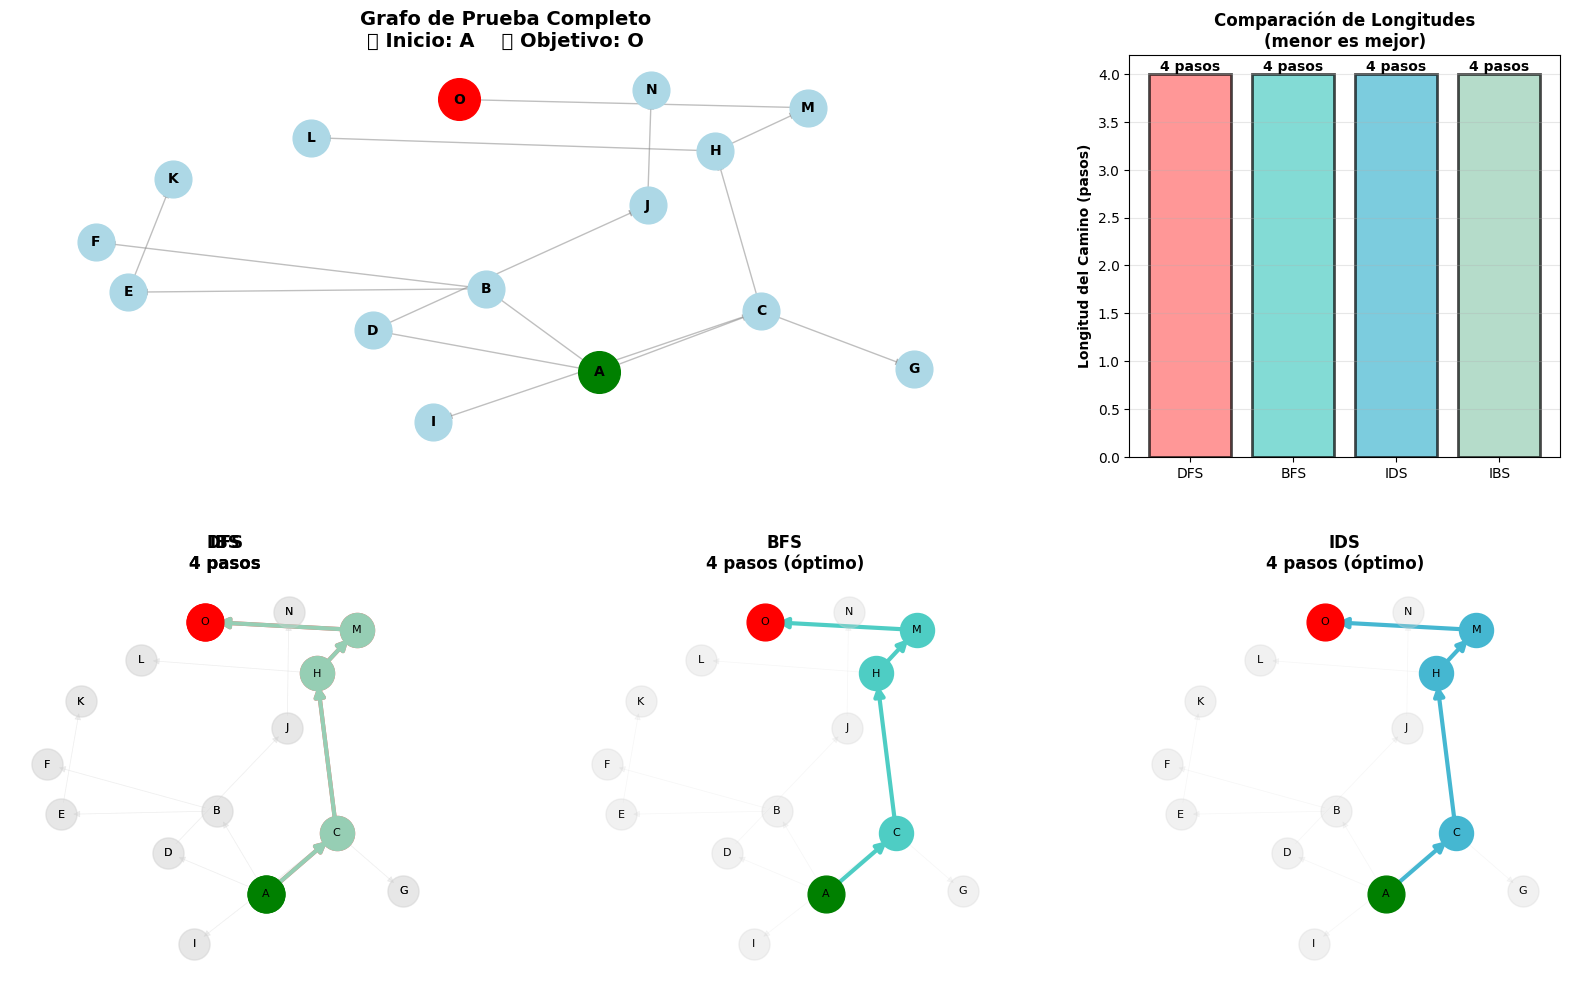


🔍 ANÁLISIS DE RESULTADOS:

🔴 DFS:
   • Camino: A → C → H → M → O
   • Longitud: 4 pasos
   • ⚠️ No garantiza el camino más corto

🔵 BFS:
   • Camino: A → C → H → M → O
   • Longitud: 4 pasos
   • ✅ Garantiza el camino MÁS CORTO

🔄 IDS:
   • Camino: A → C → H → M → O
   • Longitud: 4 pasos
   • ✅ Óptimo como BFS + poca memoria como DFS

🔄 IBS:
   • Camino: A → C → H → M → O
   • Longitud: 4 pasos
   • 💡 Útil cuando hay muchas ramas por nodo



In [7]:
# ====================
# VISUALIZACIÓN COMPARATIVA DE LOS 4 ALGORITMOS
# ====================

# Creamos el grafo de prueba con NetworkX
G_comp = nx.DiGraph()
for nodo, vecinos in grafo_prueba.items():
    for vecino in vecinos:
        G_comp.add_edge(nodo, vecino)

# Layout jerárquico
pos_comp = nx.spring_layout(G_comp, seed=789, k=1.2)

# Creamos figura con 5 subgráficos (1 para el grafo base + 4 para los algoritmos)
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# ===== GRÁFICO 1: GRAFO BASE (ocupa 2 columnas) =====
ax_base = fig.add_subplot(gs[0, :2])

nx.draw_networkx_nodes(G_comp, pos_comp, node_color='lightblue',
                       node_size=700, ax=ax_base)
nx.draw_networkx_edges(G_comp, pos_comp, edge_color='gray',
                       width=1, alpha=0.5, arrows=True, ax=ax_base)
nx.draw_networkx_labels(G_comp, pos_comp, font_size=10,
                        font_weight='bold', ax=ax_base)

# Resaltamos inicio y objetivo
nx.draw_networkx_nodes(G_comp, pos_comp, nodelist=['A'],
                       node_color='green', node_size=900, ax=ax_base)
nx.draw_networkx_nodes(G_comp, pos_comp, nodelist=['O'],
                       node_color='red', node_size=900, ax=ax_base)

ax_base.set_title('Grafo de Prueba Completo\n🟢 Inicio: A    🔴 Objetivo: O',
                  fontsize=14, fontweight='bold')
ax_base.axis('off')

# ===== GRÁFICO 2: COMPARACIÓN DE LONGITUDES =====
ax_bar = fig.add_subplot(gs[0, 2])

algoritmos = ['DFS', 'BFS', 'IDS', 'IBS']
longitudes = [
    len(camino_dfs)-1 if camino_dfs else 0,
    len(camino_bfs)-1 if camino_bfs else 0,
    len(camino_ids)-1 if camino_ids else 0,
    len(camino_ibs)-1 if camino_ibs else 0
]
colores = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']

bars = ax_bar.bar(algoritmos, longitudes, color=colores, alpha=0.7, edgecolor='black', linewidth=2)

# Agregamos valores encima de las barras
for i, (bar, val) in enumerate(zip(bars, longitudes)):
    height = bar.get_height()
    ax_bar.text(bar.get_x() + bar.get_width()/2., height,
                f'{val} pasos', ha='center', va='bottom', fontweight='bold')

ax_bar.set_ylabel('Longitud del Camino (pasos)', fontweight='bold')
ax_bar.set_title('Comparación de Longitudes\n(menor es mejor)', fontweight='bold')
ax_bar.grid(axis='y', alpha=0.3)

# ===== GRÁFICOS 3-6: CAMINOS DE CADA ALGORITMO =====
caminos = [camino_dfs, camino_bfs, camino_ids, camino_ibs]
titulos = [
    f'DFS\n{len(camino_dfs)-1} pasos' if camino_dfs else 'DFS',
    f'BFS\n{len(camino_bfs)-1} pasos (óptimo)' if camino_bfs else 'BFS',
    f'IDS\n{len(camino_ids)-1} pasos (óptimo)' if camino_ids else 'IDS',
    f'IBS\n{len(camino_ibs)-1} pasos' if camino_ibs else 'IBS'
]

for idx, (camino, titulo, color) in enumerate(zip(caminos, titulos, colores)):
    ax = fig.add_subplot(gs[1, idx % 3])
    
    # Dibujamos base transparente
    nx.draw_networkx_nodes(G_comp, pos_comp, node_color='lightgray',
                           node_size=500, alpha=0.3, ax=ax)
    nx.draw_networkx_edges(G_comp, pos_comp, edge_color='lightgray',
                           width=0.5, alpha=0.2, arrows=True, ax=ax)
    nx.draw_networkx_labels(G_comp, pos_comp, font_size=8, ax=ax)
    
    # Dibujamos el camino si existe
    if camino:
        # Nodos del camino
        nx.draw_networkx_nodes(G_comp, pos_comp, nodelist=camino,
                               node_color=color, node_size=600, ax=ax)
        
        # Aristas del camino
        camino_edges = [(camino[i], camino[i+1]) for i in range(len(camino)-1)]
        nx.draw_networkx_edges(G_comp, pos_comp, edgelist=camino_edges,
                               edge_color=color, width=3, arrows=True,
                               arrowsize=15, ax=ax)
        
        # Inicio y fin
        nx.draw_networkx_nodes(G_comp, pos_comp, nodelist=[camino[0]],
                               node_color='green', node_size=700, ax=ax)
        nx.draw_networkx_nodes(G_comp, pos_comp, nodelist=[camino[-1]],
                               node_color='red', node_size=700, ax=ax)
    
    ax.set_title(titulo, fontsize=12, fontweight='bold')
    ax.axis('off')
    
    # Si llegamos a 3 gráficos, pasamos a la siguiente fila
    if idx == 2:
        # El 4to gráfico va en la segunda fila
        pass

plt.tight_layout()
plt.show()

# ===== ANÁLISIS TEXTUAL =====
print("\n" + "=" * 70)
print("🔍 ANÁLISIS DE RESULTADOS:")
print("=" * 70)

print("\n🔴 DFS:")
print(f"   • Camino: {' → '.join(camino_dfs) if camino_dfs else 'N/A'}")
print(f"   • Longitud: {len(camino_dfs)-1 if camino_dfs else 'N/A'} pasos")
print(f"   • ⚠️ No garantiza el camino más corto")

print("\n🔵 BFS:")
print(f"   • Camino: {' → '.join(camino_bfs) if camino_bfs else 'N/A'}")
print(f"   • Longitud: {len(camino_bfs)-1 if camino_bfs else 'N/A'} pasos")
print(f"   • ✅ Garantiza el camino MÁS CORTO")

print("\n🔄 IDS:")
print(f"   • Camino: {' → '.join(camino_ids) if camino_ids else 'N/A'}")
print(f"   • Longitud: {len(camino_ids)-1 if camino_ids else 'N/A'} pasos")
print(f"   • ✅ Óptimo como BFS + poca memoria como DFS")

print("\n🔄 IBS:")
print(f"   • Camino: {' → '.join(camino_ibs) if camino_ibs else 'N/A'}")
print(f"   • Longitud: {len(camino_ibs)-1 if camino_ibs else 'N/A'} pasos")
print(f"   • 💡 Útil cuando hay muchas ramas por nodo")

print("\n" + "=" * 70)


## 🌍 Casos Reales de Uso

### 🔄 IDS (Iterative Deepening Search)

**Usado en:**

1. **Inteligencia Artificial en Juegos**
   - Ajedrez, damas, Go
   - Busca la mejor jugada sin usar demasiada memoria
   
2. **Planificación de Rutas con Restricciones**
   - Cuando hay límite de "saltos" o "paradas"
   - Sistemas de transporte público

3. **Análisis de Redes Sociales**
   - Encontrar "grados de separación" eficientemente
   - No necesita cargar toda la red en memoria

### 🔄 IBS (Iterative Broadening Search)

**Usado en:**

1. **Motores de Búsqueda**
   - Cuando hay millones de enlaces salientes
   - Limita cuántos enlaces explorar por página

2. **Juegos de Estrategia**
   - Cuando cada estado tiene MUCHAS posibles acciones
   - Ejemplo: juegos de cartas con muchas combinaciones

3. **Sistemas de Recomendación**
   - Explorar recomendaciones gradualmente
   - No analizar todas las opciones a la vez


## 📈 Visualización: ¿Cómo funcionan realmente?

Vamos a visualizar paso a paso cómo IDS explora un grafo.


In [10]:
# ====================
# VISUALIZACIÓN DE IDS
# ====================

print("=" * 70)
print("🎬 DEMOSTRACIÓN VISUAL: IDS paso a paso")
print("=" * 70)

# Grafo simple para visualizar
grafo_visual = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],  # ¡Aquí está el objetivo!
    'F': [],
    'G': []
}

print("\n📍 Estructura del grafo:")
print("""
        A
       / \\
      B   C
     / \\   \\
    D   E   F
        |
        G  ← OBJETIVO
""")

def ids_visual(grafo, inicio, objetivo, max_prof):
    """IDS con salida visual detallada"""
    
    for prof in range(max_prof + 1):
        print(f"\n{'='*70}")
        print(f"🔄 ITERACIÓN {prof + 1}: Profundidad máxima = {prof}")
        print(f"{'='*70}")
        
        # Ejecutamos DFS limitado
        resultado = dfs_limitado_visual(grafo, inicio, objetivo, prof, [])
        
        if resultado:
            print(f"\n✅ ¡OBJETIVO ENCONTRADO en profundidad {prof}!")
            print(f"   Camino final: {' → '.join(resultado)}")
            return resultado
        else:
            print(f"\n❌ No encontrado en profundidad {prof}")
    
    return None

def dfs_limitado_visual(grafo, nodo, objetivo, limite, camino, nivel=0):
    """DFS limitado con salida visual"""
    
    # Indentación según el nivel
    indent = "  " * nivel
    
    camino = camino + [nodo]
    print(f"{indent}└─ Visitando '{nodo}' (profundidad {nivel})")
    
    if nodo == objetivo:
        print(f"{indent}   🎯 ¡Es el objetivo!")
        return camino
    
    if limite <= 0:
        print(f"{indent}   ⛔ Límite de profundidad alcanzado")
        return None
    
    for vecino in grafo.get(nodo, []):
        if vecino not in camino:
            resultado = dfs_limitado_visual(
                grafo, vecino, objetivo, limite - 1, camino, nivel + 1
            )
            if resultado:
                return resultado
    
    return None

# Ejecutamos la visualización
resultado_visual = ids_visual(grafo_visual, 'A', 'G', max_prof=5)

print("\n" + "=" * 70)
print("💡 OBSERVACIONES:")
print("=" * 70)
print("• En cada iteración, IDS explora TODOS los nodos hasta esa profundidad")
print("• Algunos nodos se visitan múltiples veces (pero vale la pena)")
print("• Una vez encontrado el objetivo, ¡sabemos que es el camino más corto!")
print("=" * 70)


🎬 DEMOSTRACIÓN VISUAL: IDS paso a paso

📍 Estructura del grafo:

        A
       / \
      B   C
     / \   \
    D   E   F
        |
        G  ← OBJETIVO


🔄 ITERACIÓN 1: Profundidad máxima = 0
└─ Visitando 'A' (profundidad 0)
   ⛔ Límite de profundidad alcanzado

❌ No encontrado en profundidad 0

🔄 ITERACIÓN 2: Profundidad máxima = 1
└─ Visitando 'A' (profundidad 0)
  └─ Visitando 'B' (profundidad 1)
     ⛔ Límite de profundidad alcanzado
  └─ Visitando 'C' (profundidad 1)
     ⛔ Límite de profundidad alcanzado

❌ No encontrado en profundidad 1

🔄 ITERACIÓN 3: Profundidad máxima = 2
└─ Visitando 'A' (profundidad 0)
  └─ Visitando 'B' (profundidad 1)
    └─ Visitando 'D' (profundidad 2)
       ⛔ Límite de profundidad alcanzado
    └─ Visitando 'E' (profundidad 2)
       ⛔ Límite de profundidad alcanzado
  └─ Visitando 'C' (profundidad 1)
    └─ Visitando 'F' (profundidad 2)
       ⛔ Límite de profundidad alcanzado

❌ No encontrado en profundidad 2

🔄 ITERACIÓN 4: Profundidad máxima 

### 📊 Visualización Gráfica del IDS Paso a Paso


C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\718653198.py:127: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\718653198.py:127: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\718653198.py:127: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\718653198.py:127: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\718653198.py:127: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\manel.cerezo\AppData\Local\Temp\ipykernel_25756\

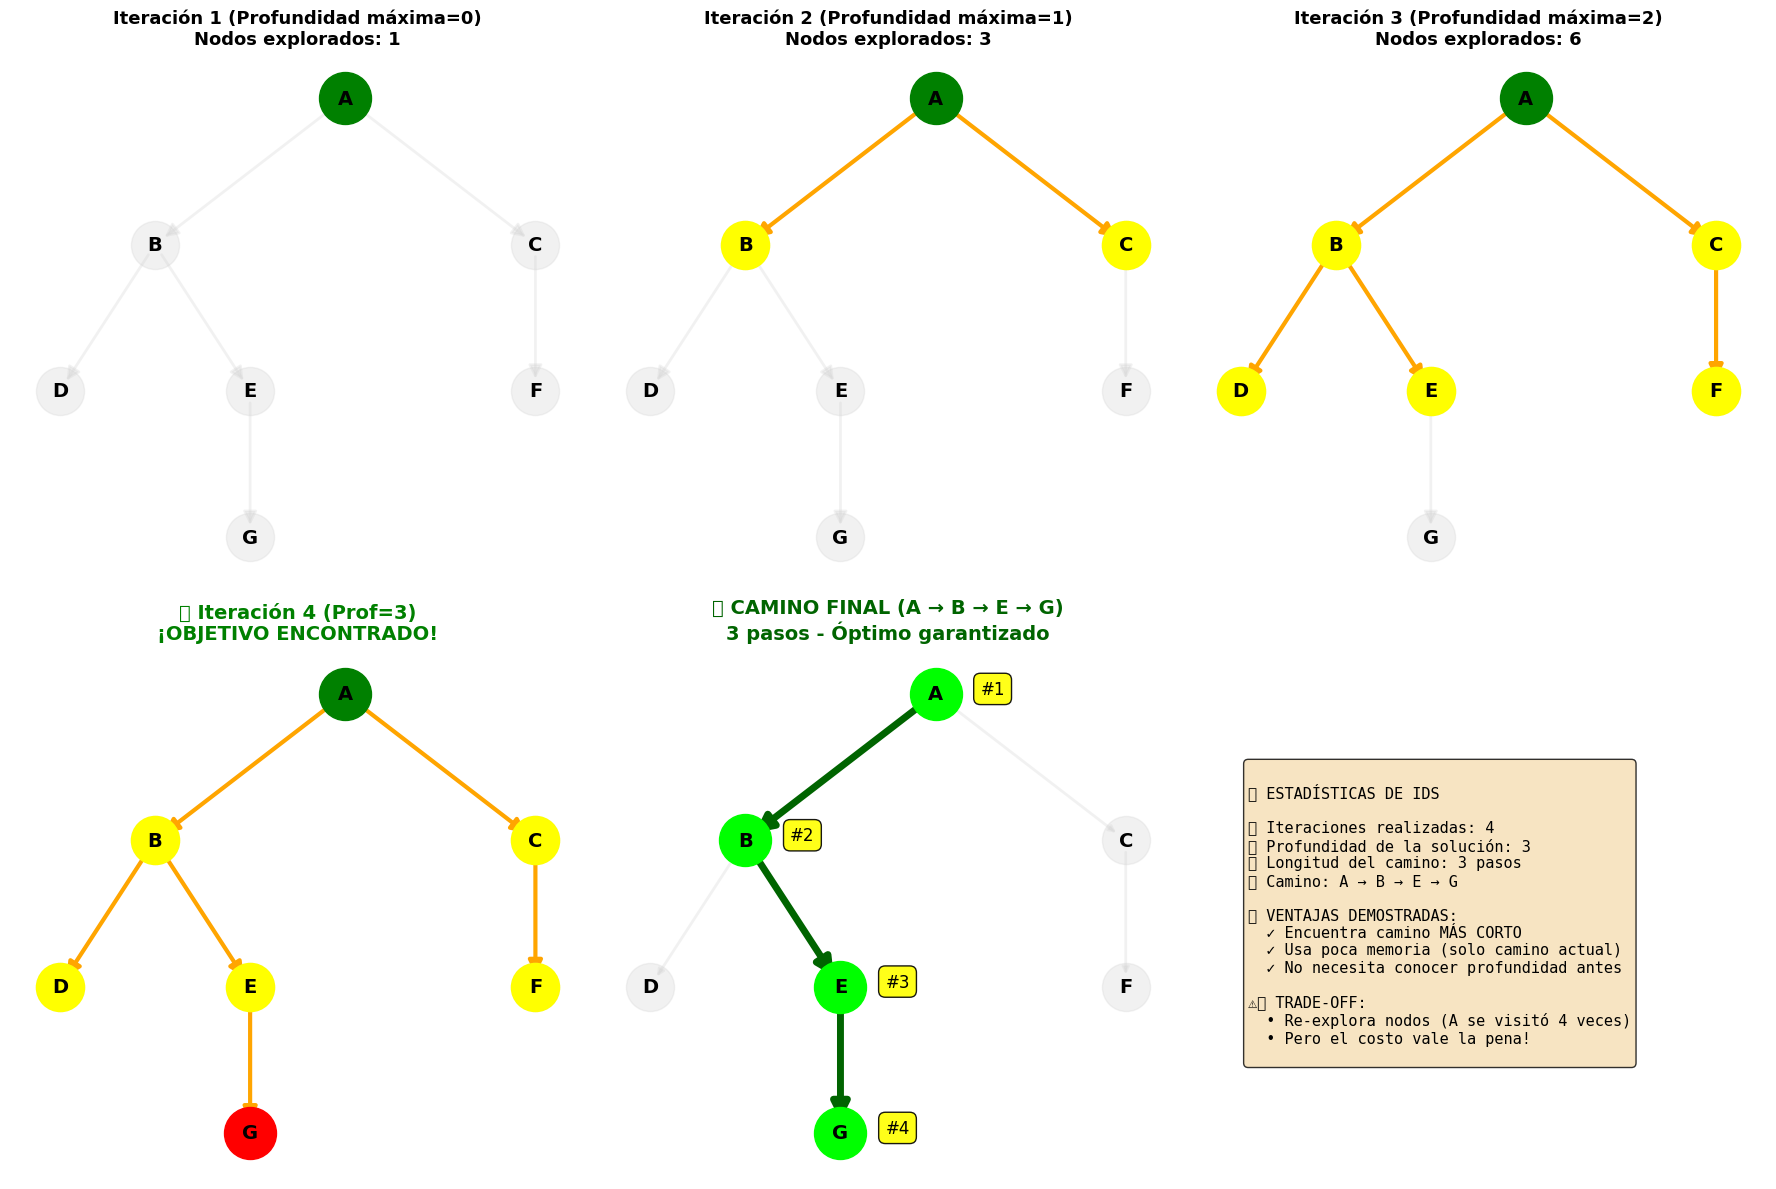


🎬 Las gráficas muestran cómo IDS explora gradualmente:
   • Iteración 1: Solo A (prof=0)
   • Iteración 2: A, B, C (prof=1)
   • Iteración 3: A, B, C, D, E, F (prof=2)
   • Iteración 4: A, B, C, D, E, F, G (prof=3) ✅ ¡Encontrado!


In [9]:
# ====================
# VISUALIZACIÓN GRÁFICA DE IDS ITERACIÓN POR ITERACIÓN
# ====================

# Creamos el grafo visual con NetworkX
G_visual = nx.DiGraph()
for nodo, vecinos in grafo_visual.items():
    for vecino in vecinos:
        G_visual.add_edge(nodo, vecino)

# Posiciones fijas para mejor visualización
pos_visual = {
    'A': (2, 3),
    'B': (1, 2),
    'C': (3, 2),
    'D': (0.5, 1),
    'E': (1.5, 1),
    'F': (3, 1),
    'G': (1.5, 0)
}

# Simulamos cada iteración de IDS
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Definimos qué nodos se exploran en cada profundidad
nodos_por_profundidad = [
    ['A'],                    # Prof 0
    ['A', 'B', 'C'],         # Prof 1
    ['A', 'B', 'C', 'D', 'E', 'F'],  # Prof 2
    ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Prof 3 - ¡Encontrado!
]

for idx, (profundidad, nodos_explorados) in enumerate(zip(range(4), nodos_por_profundidad)):
    ax = axes[idx]
    
    # Dibujamos el grafo base (transparente)
    nx.draw_networkx_nodes(G_visual, pos_visual, node_color='lightgray',
                           node_size=1200, alpha=0.3, ax=ax)
    nx.draw_networkx_edges(G_visual, pos_visual, edge_color='lightgray',
                           width=2, alpha=0.3, arrows=True, arrowsize=20, ax=ax)
    
    # Resaltamos los nodos explorados en esta iteración
    nx.draw_networkx_nodes(G_visual, pos_visual, nodelist=nodos_explorados,
                           node_color='yellow', node_size=1200, ax=ax)
    nx.draw_networkx_edges(G_visual, pos_visual,
                           edgelist=[(nodos_explorados[i], v) 
                                    for i in range(len(nodos_explorados))
                                    for v in grafo_visual.get(nodos_explorados[i], [])
                                    if v in nodos_explorados],
                           edge_color='orange', width=3, arrows=True,
                           arrowsize=20, ax=ax)
    
    nx.draw_networkx_labels(G_visual, pos_visual, font_size=14,
                            font_weight='bold', ax=ax)
    
    # Marcamos inicio y objetivo
    nx.draw_networkx_nodes(G_visual, pos_visual, nodelist=['A'],
                           node_color='green', node_size=1400, ax=ax)
    if 'G' in nodos_explorados:
        nx.draw_networkx_nodes(G_visual, pos_visual, nodelist=['G'],
                               node_color='red', node_size=1400, ax=ax)
        ax.set_title(f'✅ Iteración {profundidad + 1} (Prof={profundidad})\n¡OBJETIVO ENCONTRADO!',
                     fontsize=14, fontweight='bold', color='green')
    else:
        ax.set_title(f'Iteración {profundidad + 1} (Profundidad máxima={profundidad})\nNodos explorados: {len(nodos_explorados)}',
                     fontsize=13, fontweight='bold')
    
    ax.axis('off')

# Gráfico 5: Camino final encontrado
ax5 = axes[4]
nx.draw_networkx_nodes(G_visual, pos_visual, node_color='lightgray',
                       node_size=1200, alpha=0.3, ax=ax5)
nx.draw_networkx_edges(G_visual, pos_visual, edge_color='lightgray',
                       width=2, alpha=0.3, arrows=True, ax=ax5)

# Camino final: A → B → E → G
camino_final = ['A', 'B', 'E', 'G']
nx.draw_networkx_nodes(G_visual, pos_visual, nodelist=camino_final,
                       node_color='lime', node_size=1400, ax=ax5)

camino_edges_final = [('A', 'B'), ('B', 'E'), ('E', 'G')]
nx.draw_networkx_edges(G_visual, pos_visual, edgelist=camino_edges_final,
                       edge_color='darkgreen', width=5, arrows=True,
                       arrowsize=25, ax=ax5)

nx.draw_networkx_labels(G_visual, pos_visual, font_size=14,
                        font_weight='bold', ax=ax5)

# Números de orden
for i, nodo in enumerate(camino_final):
    x, y = pos_visual[nodo]
    ax5.text(x+0.3, y, f'#{i+1}', fontsize=12, ha='center',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.9))

ax5.set_title('🎯 CAMINO FINAL (A → B → E → G)\n3 pasos - Óptimo garantizado',
              fontsize=14, fontweight='bold', color='darkgreen')
ax5.axis('off')

# Gráfico 6: Estadísticas
ax6 = axes[5]
ax6.axis('off')

# Texto con estadísticas
estadisticas = """
📊 ESTADÍSTICAS DE IDS

🔄 Iteraciones realizadas: 4
✅ Profundidad de la solución: 3
📏 Longitud del camino: 3 pasos
🎯 Camino: A → B → E → G

💡 VENTAJAS DEMOSTRADAS:
  ✓ Encuentra camino MÁS CORTO
  ✓ Usa poca memoria (solo camino actual)
  ✓ No necesita conocer profundidad antes

⚠️ TRADE-OFF:
  • Re-explora nodos (A se visitó 4 veces)
  • Pero el costo vale la pena!
"""

ax6.text(0.1, 0.5, estadisticas, fontsize=11, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎬 Las gráficas muestran cómo IDS explora gradualmente:")
print("   • Iteración 1: Solo A (prof=0)")
print("   • Iteración 2: A, B, C (prof=1)")
print("   • Iteración 3: A, B, C, D, E, F (prof=2)")
print("   • Iteración 4: A, B, C, D, E, F, G (prof=3) ✅ ¡Encontrado!")


## 🎯 Ejercicios Prácticos

### Nivel Básico 🟢

1. **Árbol Genealógico con IDS**
   - Crea un árbol familiar con 3 generaciones
   - Usa IDS para encontrar relaciones (bisabuelo → bisnieto)

2. **Red de Computadoras con IBS**
   - Cada router tiene 5+ conexiones
   - Usa IBS para encontrar rutas limitando conexiones exploradas

### Nivel Intermedio 🟡

3. **Puzzle de 8-Piezas**
   - Implementa IDS para resolver el puzzle
   - Compara tiempo vs BFS

4. **Sistema de Vuelos**
   - Encuentra vuelos con máximo N escalas (IDS)
   - Limita aerolíneas consideradas (IBS)

### Nivel Avanzado 🔴

5. **Juego de Torres de Hanoi**
   - Usa IDS para encontrar la solución óptima
   - Compara con DFS y BFS

6. **Planificador de Tareas**
   - Tareas con dependencias y prioridades
   - IDS para encontrar orden óptimo con restricciones

7. **Navegación en Laberinto 3D**
   - Laberinto de múltiples pisos
   - IDS para encontrar salida con límite de pisos

### 💡 Preguntas para Reflexionar

- ¿Por qué IDS re-explora nodos pero sigue siendo eficiente?
- ¿Cuándo es IBS mejor que IDS?
- ¿Qué complejidad temporal tiene IDS comparado con BFS?
- ¿Cómo modificarías IDS para grafos con ciclos?


## 📚 Resumen Final

### 🔄 IDS (Iterative Deepening Search)

**Cuándo usar:**
- Quieres el camino MÁS CORTO (como BFS)
- Pero tienes POCA MEMORIA disponible
- Profundidad de solución es desconocida

**Complejidad:**
- Tiempo: O(b^d) - Similar a BFS
- Espacio: O(d) - Como DFS ¡Mucho mejor que BFS!

---

### 🔄 IBS (Iterative Broadening Search)

**Cuándo usar:**
- Cada nodo tiene MUCHOS hijos (alto branching factor)
- Memoria es limitada
- Solo algunas ramas son prometedoras

**Complejidad:**
- Depende del branching factor
- Útil cuando b >> d (muchos hijos, poca profundidad)

---

### 🎯 Decisión Rápida

| Situación | Algoritmo Recomendado |
|-----------|----------------------|
| Memoria ilimitada + camino corto | **BFS** |
| Poca memoria + cualquier camino | **DFS** |
| Poca memoria + camino corto | **IDS** ⭐ |
| Alto branching factor | **IBS** ⭐ |
| Grafo con pesos | Dijkstra/A* |

---

### 💡 Conclusión

**IDS** e **IBS** son algoritmos **híbridos inteligentes** que:
- Combinan las ventajas de DFS (memoria) y BFS (optimalidad)
- Son perfectos para inteligencia artificial y juegos
- Demuestran que a veces "repetir trabajo" vale la pena

¡Practica con los ejercicios para dominar estos algoritmos! 🚀
